In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
from tqdm import tqdm
import torch
from datetime import datetime
import matplotlib.pyplot as plt 
from dataloader import InsectDatamodule
import pickle
from sklearn.metrics import confusion_matrix
import numpy as np

from model_10 import ResNet

import librosa.display


In [13]:
# initialize the datamodule

csv_paths = ['../data/Cicadidae.csv', '../data/Orthoptera.csv']

batch_size = 1
num_workers = 0

n_fft = 1000
hop_length =  147
win_length = int(hop_length * 2)
n_mels = 64

datamodule = InsectDatamodule(csv_paths = csv_paths, batch_size = batch_size, num_workers = num_workers, hop_length = hop_length, n_fft = n_fft, win_length = win_length, n_mels = n_mels)

train_dataloader = datamodule.train_dataloader()
val_dataloader = datamodule.val_dataloader()

c:\Users\kraft\.conda\envs\torch_cuda\Lib\site-packages\torchaudio\functional\functional.py:584: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (64) may be set too high. Or, the value for `n_freqs` (501) may be set too low.
  warnings.warn(


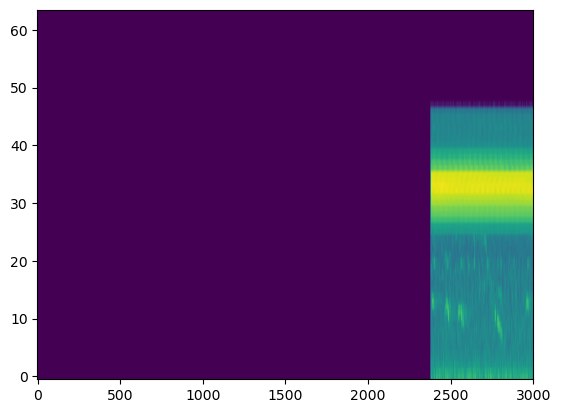

In [16]:
x, y = train_dataloader.dataset[15]
x.shape

plt.imshow(x.numpy()+10**-2, origin='lower', aspect='auto')

In [15]:
x.numpy().shape

(64, 3001)

In [5]:
waveform, samplerate = train_dataloader.dataset.load_sample('../data/Cicadidae/Myopsaltamelanobasis/Myopsaltamelanobasis_Myopsalta_melanobasis_Brigalow.wav')

In [144]:
waveform, samplerate = val_dataloader.dataset.load_sample('../data/Cicadidae/Myopsaltamelanobasis/Myopsaltamelanobasis_Myopsalta_melanobasis_Brigalow.wav')

In [24]:
x = val_dataloader.dataset.get_random_part_padded(waveform=waveform, samplerate=samplerate)
plt.plot()

NameError: name 'waveform' is not defined

In [79]:
np.random.randint(0, 2, 1)

array([1])

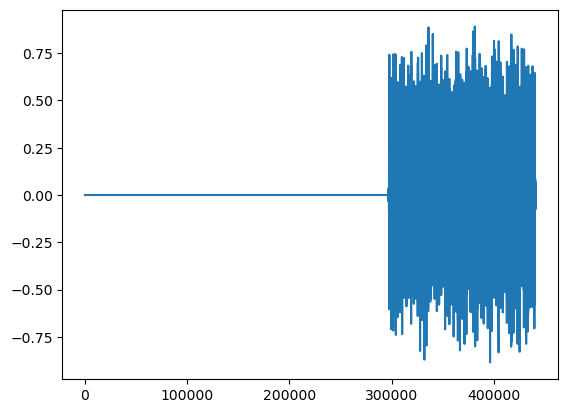

In [48]:
import matplotlib.pyplot as plt
plt.plot(x[0, :])

In [30]:
import numpy as np
import torch

min_len_in_seconds = 1
max_len_in_seconds = 10

min_len_in_samles = min_len_in_seconds * samplerate
max_len_in_samles = max_len_in_seconds * samplerate

part_length = np.random.randint(min_len_in_samles, max_len_in_samles + 1, 1)
sample_length = waveform.shape[1]

part_length = min(part_length, sample_length)

sample_start_index = np.random.randint(0, sample_length - part_length + 1)
sample_end_index = sample_start_index + part_length

pad_length = max_len_in_samles - part_length

waveform_pad = torch.nn.functional.pad(waveform, pad=(pad_length, 0, 0, 0))

In [31]:
waveform_pad

tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0161,  0.0060, -0.0034]])

In [24]:
np.random.randint(0, 1)

0

In [10]:
waveform.shape

torch.Size([1, 144096])